# Advanced Regression Assignment 


## Section- 1:
This section contains the code for Assignment -part -I

### Problem Statement: 
A US - based Housing company wants to enter into Australian market . We need to build a regressiom model using Regularisation which can predict the actual value of prospective properties and estimate whether to invest in them or not.

#### Steps:

   1. Data Exploration and cleaning:
   
    Given data is explored to understand and identify the missing values in various columns and the missing values were treated. The categorical columns are identified and dummified.The ordinal variables were identified and are mapped to values. Highly skewed columns (>80%) were removed. The missing values in some of the columns with less missing value % were imputed with suitable values.(mean/median/most_frequent)
    
   2. Train_test_Split of Data
    
   3. Scaling the features:
    StandardScaler method was used for scaling the columns(numerical and ordinal variables)
    
   4. Feature Selection using RFE:
     Important features(25) were selected using RFE method.
     
   5. Model Building and Evaluation
   
     5.1. Ridge Regression model was built and evaluated with the r2_scores of train and test sets.
          Optimal value of alpha was found and model is fit and coefficients were listed. Top 5 important variables were identified.
          
     5.2. Lasso Regression model was built and evaluated with the r2_scores of train and test sets.
          Optimal value of alpha was found and model is fit and coefficients were listed. Top 5 important variables were identified.
          
## Section- 2:

This section contains the code required to execute for answering the Part_II of the Assignment(Subjective Questions).


# Section-1

## Assignment-Part-I

## Step 1: Data Exploration and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns',81)
pd.set_option('display.max_rows',150)

# Show all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Understanding data 
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### 1.1 Checking missing percentage of individual columns -

In [7]:
round((housing.isnull().sum()/len(housing.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

The columns Alley,PoolQC,Fence,MiscFeature are havinfg large % missing values .So it is better to remove them.
The column Miscval is the value of Misc feature, so it also has no meaning now and can be removed.

### 1.2. Removing columns with high missing value percentages

In [8]:
# Removing columns with high percentage of missing values
housing=housing.drop(['Alley','PoolQC','Fence','MiscFeature','MiscVal'],axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
housing.shape

(1460, 76)

### 1.3 Separating Numerical columns 

In [10]:
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,4,2010,142125


<Figure size 1440x1440 with 0 Axes>

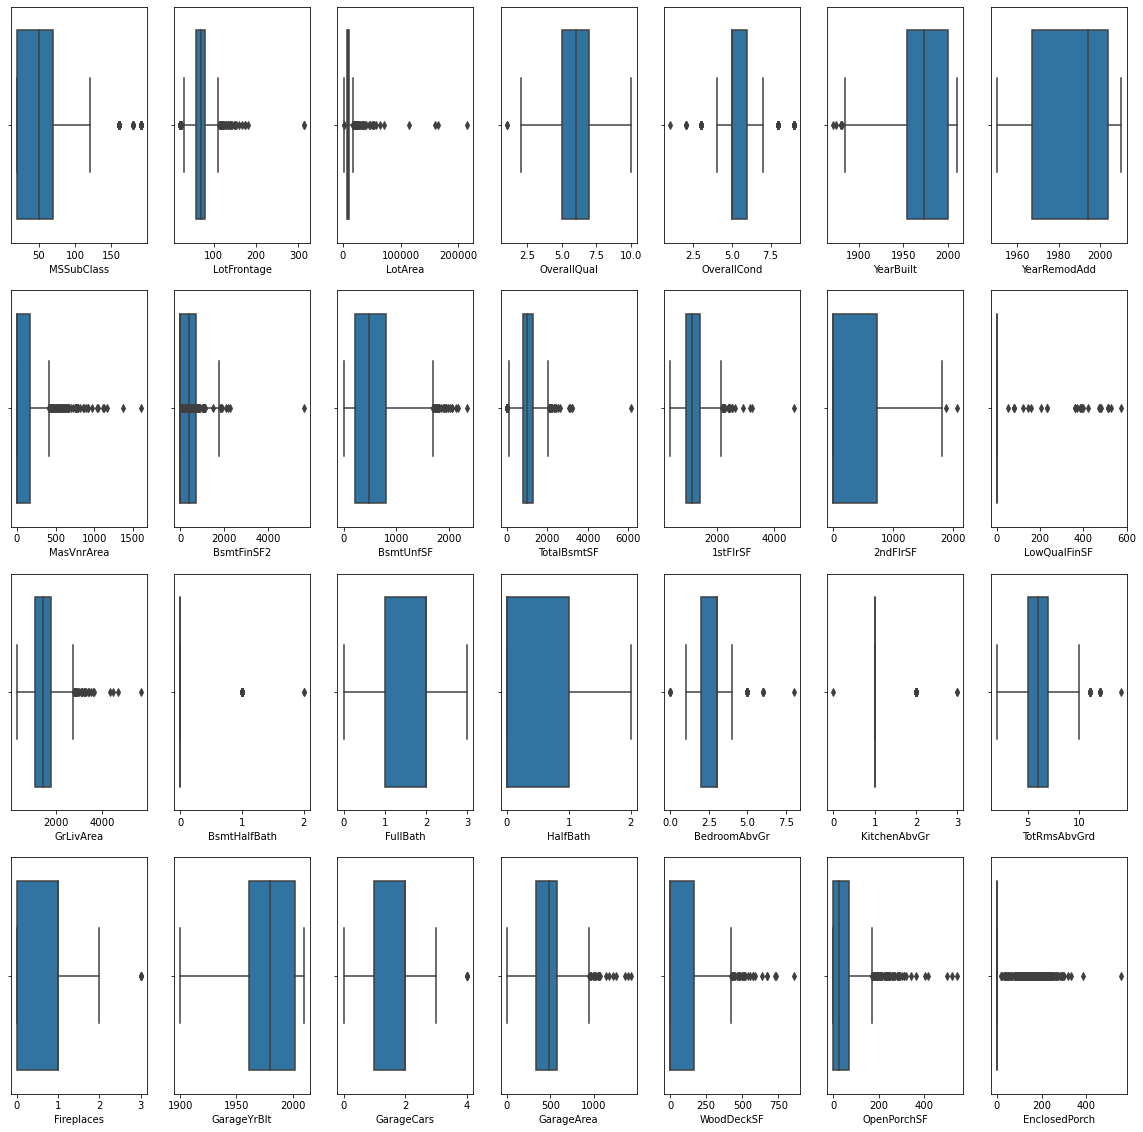

In [11]:
# plot of continuous/numerical variables
plt.figure(figsize=(20,20))
plt.subplot(4,7,1)
sns.boxplot(housing['MSSubClass'])
plt.subplot(4,7,2)
sns.boxplot(housing['LotFrontage'])
plt.subplot(4,7,3)
sns.boxplot(housing['LotArea'])
plt.subplot(4,7,4)
sns.boxplot(housing['OverallQual'])
plt.subplot(4,7,5)
sns.boxplot(housing['OverallCond'])
plt.subplot(4,7,6)
sns.boxplot(housing['YearBuilt'])
plt.subplot(4,7,7)
sns.boxplot(housing['YearRemodAdd'])
plt.subplot(4,7,8)
sns.boxplot(housing['MasVnrArea'])
plt.subplot(4,7,9)
sns.boxplot(housing['BsmtFinSF1'])
plt.subplot(4,7,9)
sns.boxplot(housing['BsmtFinSF2'])
plt.subplot(4,7,10)
sns.boxplot(housing['BsmtUnfSF'])
plt.subplot(4,7,11)
sns.boxplot(housing['TotalBsmtSF'])
plt.subplot(4,7,12)
sns.boxplot(housing['1stFlrSF'])
plt.subplot(4,7,13)
sns.boxplot(housing['2ndFlrSF'])
plt.subplot(4,7,14)
sns.boxplot(housing['LowQualFinSF'])
plt.subplot(4,7,15)
sns.boxplot(housing['GrLivArea'])
plt.subplot(4,7,16)
sns.boxplot(housing['BsmtHalfBath'])
plt.subplot(4,7,17)
sns.boxplot(housing['FullBath'])
plt.subplot(4,7,18)
sns.boxplot(housing['HalfBath'])
plt.subplot(4,7,19)
sns.boxplot(housing['BedroomAbvGr'])
plt.subplot(4,7,20)
sns.boxplot(housing['KitchenAbvGr'])
plt.subplot(4,7,21)
sns.boxplot(housing['TotRmsAbvGrd'])
plt.subplot(4,7,22)
sns.boxplot(housing['Fireplaces'])
plt.subplot(4,7,23)
sns.boxplot(housing['GarageYrBlt'])
plt.subplot(4,7,24)
sns.boxplot(housing['GarageCars'])
plt.subplot(4,7,25)
sns.boxplot(housing['GarageArea'])
plt.subplot(4,7,26)
sns.boxplot(housing['WoodDeckSF'])
plt.subplot(4,7,27)
sns.boxplot(housing['OpenPorchSF'])
plt.subplot(4,7,28)
sns.boxplot(housing['EnclosedPorch'])

plt.show()

<Figure size 864x720 with 0 Axes>

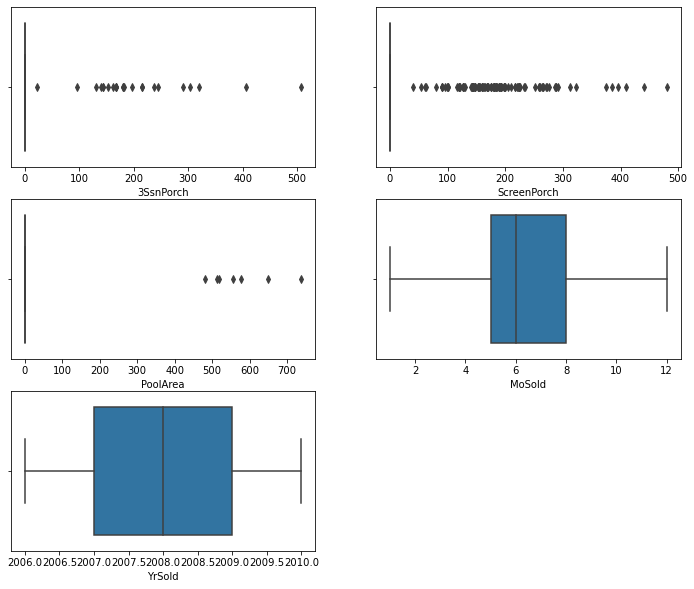

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.boxplot(housing['3SsnPorch'])
plt.subplot(3,2,2)
sns.boxplot(housing['ScreenPorch'])
plt.subplot(3,2,3)
sns.boxplot(housing['PoolArea'])
plt.subplot(3,2,4)
sns.boxplot(housing['MoSold'])
plt.subplot(3,2,5)
sns.boxplot(housing['YrSold'])
plt.show()

In the other missing value columns the missing values in LotFrontage are to be imputed with median because of the presence of outliers and missing values in  GarageYrBlt are imputed with mean.

### 1.4 Imputing Missing values in the columns

In [13]:
# imputing the missing values in LotFrontage and GarageYrBlt
mean1=housing['GarageYrBlt'].mean()
median1=housing['LotFrontage'].median()
housing['GarageYrBlt'].replace(np.NaN,mean1,inplace=True)
housing['LotFrontage'].replace(np.NaN,median1,inplace=True)


In [14]:
round((housing.isnull().sum()/len(housing.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

### 1.5. Checking for Data imbalance in categorical columns

In [15]:
round(housing['BsmtQual'].value_counts(normalize=True),4)*100

TA    45.61
Gd    43.43
Ex     8.50
Fa     2.46
Name: BsmtQual, dtype: float64

In [16]:
round(housing['BsmtCond'].value_counts(normalize=True),4)*100

TA    92.13
Gd     4.57
Fa     3.16
Po     0.14
Name: BsmtCond, dtype: float64

In [17]:
round(housing['BsmtExposure'].value_counts(normalize=True),4)*100

No    67.02
Av    15.54
Gd     9.42
Mn     8.02
Name: BsmtExposure, dtype: float64

In [18]:
round(housing['BsmtFinType1'].value_counts(normalize=True),4)*100

Unf    30.22
GLQ    29.37
ALQ    15.46
BLQ    10.40
Rec     9.35
LwQ     5.20
Name: BsmtFinType1, dtype: float64

In [19]:
round(housing['BsmtFinType2'].value_counts(normalize=True),4)*100

Unf    88.33
Rec     3.80
LwQ     3.23
BLQ     2.32
ALQ     1.34
GLQ     0.98
Name: BsmtFinType2, dtype: float64

In [20]:
round(housing['FireplaceQu'].value_counts(normalize=True),4)*100

Gd    49.35
TA    40.65
Fa     4.29
Ex     3.12
Po     2.60
Name: FireplaceQu, dtype: float64

In [21]:
round(housing['GarageType'].value_counts(normalize=True),4)*100

Attchd     63.09
Detchd     28.06
BuiltIn     6.38
Basment     1.38
CarPort     0.65
2Types      0.44
Name: GarageType, dtype: float64

In [22]:
round(housing['GarageFinish'].value_counts(normalize=True),4)*100

Unf    43.87
RFn    30.60
Fin    25.53
Name: GarageFinish, dtype: float64

In [23]:
round(housing['GarageQual'].value_counts(normalize=True),4)*100

TA    95.07
Fa     3.48
Gd     1.02
Ex     0.22
Po     0.22
Name: GarageQual, dtype: float64

In [24]:
round(housing['GarageCond'].value_counts(normalize=True),4)*100

TA    96.16
Fa     2.54
Gd     0.65
Po     0.51
Ex     0.15
Name: GarageCond, dtype: float64

The Columns 'BsmtCond','BsmtFinType2','GarageQual','GarageCond' are skewed. so, they can be removed as they wont help in the analysis.

In [25]:
housing=housing.drop(['BsmtCond','BsmtFinType2','GarageQual','GarageCond'],axis=1)
housing.shape
housing.head()

(1460, 72)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


### 1.6. Dealing with Ordinal variables

In [26]:
# mapping the ordinal variables
housing['ExterQual']=housing['ExterQual'].map({'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['ExterCond']=housing['ExterCond'].map({'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['BsmtQual']=housing['BsmtQual'].map({'NA':0,'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure']=housing['BsmtExposure'].map({'NA':0,'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['BsmtFinType1']=housing['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':1,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC']=housing['HeatingQC'].map({'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['KitchenQual']=housing['KitchenQual'].map({'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
housing['FireplaceQu']=housing['FireplaceQu'].map({'NA':0,'Po':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})


In [27]:
#Mapping yes to 1 and No to 0 for binary valued columns
housing['CentralAir']=housing['CentralAir'].map({'N':0,'Y':1})

In [28]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,NaN,6.0,706,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,4.0,5.0,978,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,NaN,6.0,486,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,NaN,5.0,216,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,NaN,6.0,655,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
round((housing.isnull().sum()/len(housing.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtExposure     90.82
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea  

BsmtExposure column is having more number of missing values(>90%) and can be removed.

In [30]:
# Dropping BsmtExposure with larger missing values
housing=housing.drop('BsmtExposure',axis=1)


### 1.7. Checking the data imbalance in categorical variables

In [31]:

round(housing['MSZoning'].value_counts(normalize=True),4)*100
round(housing['Street'].value_counts(normalize=True),4)*100
round(housing['LotShape'].value_counts(normalize=True),4)*100
round(housing['LandContour'].value_counts(normalize=True),4)*100
round(housing['Utilities'].value_counts(normalize=True),4)*100
round(housing['LotConfig'].value_counts(normalize=True),4)*100
round(housing['LandSlope'].value_counts(normalize=True),4)*100
round(housing['Neighborhood'].value_counts(normalize=True),4)*100
round(housing['Condition1'].value_counts(normalize=True),4)*100
round(housing['Condition2'].value_counts(normalize=True),4)*100
round(housing['BldgType'].value_counts(normalize=True),4)*100
round(housing['HouseStyle'].value_counts(normalize=True),4)*100


RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1.71
MeadowV     1.16
Blmngtn     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64

Norm      98.97
Feedr      0.41
PosN       0.14
Artery     0.14
RRNn       0.14
RRAn       0.07
PosA       0.07
RRAe       0.07
Name: Condition2, dtype: float64

1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

In [32]:
round(housing['RoofStyle'].value_counts(normalize=True),4)*100
round(housing['RoofMatl'].value_counts(normalize=True),4)*100
round(housing['Exterior1st'].value_counts(normalize=True),4)*100
round(housing['Exterior2nd'].value_counts(normalize=True),4)*100
round(housing['MasVnrType'].value_counts(normalize=True),4)*100
round(housing['Foundation'].value_counts(normalize=True),4)*100
round(housing['Heating'].value_counts(normalize=True),4)*100
round(housing['Electrical'].value_counts(normalize=True),4)*100
round(housing['Functional'].value_counts(normalize=True),4)*100
round(housing['GarageType'].value_counts(normalize=True),4)*100
round(housing['GarageFinish'].value_counts(normalize=True),4)*100
round(housing['PavedDrive'].value_counts(normalize=True),4)*100
round(housing['SaleType'].value_counts(normalize=True),4)*100
round(housing['SaleCondition'].value_counts(normalize=True),4)*100

Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14
Name: RoofStyle, dtype: float64

CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Membran     0.07
Metal       0.07
ClyTile     0.07
Roll        0.07
Name: RoofMatl, dtype: float64

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
Stone       0.14
BrkComm     0.14
CBlock      0.07
AsphShn     0.07
ImStucc     0.07
Name: Exterior1st, dtype: float64

VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
CmentBd     4.11
Wd Shng     2.60
Stucco      1.78
BrkFace     1.71
AsbShng     1.37
ImStucc     0.68
Brk Cmn     0.48
Stone       0.34
AsphShn     0.21
CBlock      0.07
Other       0.07
Name: Exterior2nd, dtype: float64

None       59.50
BrkFace    30.65
Stone       8.82
BrkCmn      1.03
Name: MasVnrType, dtype: float64

PConc     44.32
CBlock    43.42
BrkTil    10.00
Slab       1.64
Stone      0.41
Wood       0.21
Name: Foundation, dtype: float64

GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07
Name: Heating, dtype: float64

SBrkr    91.43
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
Name: Electrical, dtype: float64

Typ     93.15
Min2     2.33
Min1     2.12
Mod      1.03
Maj1     0.96
Maj2     0.34
Sev      0.07
Name: Functional, dtype: float64

Attchd     63.09
Detchd     28.06
BuiltIn     6.38
Basment     1.38
CarPort     0.65
2Types      0.44
Name: GarageType, dtype: float64

Unf    43.87
RFn    30.60
Fin    25.53
Name: GarageFinish, dtype: float64

Y    91.78
N     6.16
P     2.05
Name: PavedDrive, dtype: float64

WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLw     0.34
ConLI     0.34
CWD       0.27
Oth       0.21
Con       0.14
Name: SaleType, dtype: float64

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64

From the above obeservations ,it is found that some of the columns are skewed( >80% same values) & can be removed as they don't contribute munch in the prediction.
The columns which are skewed are as follows:

    1. Street 2. LandContour 3.Utilities 4. LandSlope 5. Condition1 6. Condition2 7.BldgType 8.RoofMatl 9. Heating
    
    10. Electrical 11. Functional 12. PavedDrive 13. SaleType  14.SaleCondition 

### 1.8. Removing  Skewed columns

In [33]:
# Removal of highly imbalanced columns
housing=housing.drop(['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','Heating'
,'Electrical','Functional','PavedDrive','SaleType','SaleCondition'],axis=1)

In [34]:
housing['MSZoning'].replace(to_replace=['FV','RH','C (all)'],value='Others',inplace=True)
housing['LotShape'].replace(to_replace=['IR2','IR3'],value='Others',inplace=True)
housing['LotConfig'].replace(to_replace=['FR2','FR3'],value='Others',inplace=True)
housing['Neighborhood'].replace(to_replace=['NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR',
                                            'ClearCr','StoneBr','SWISU','MeadowV','Blmngtn','BrDale','Veenker','NPkVill',
                                            'Blueste'],value='Others',inplace=True)
housing['HouseStyle'].replace(to_replace=['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],value='Others',inplace=True)
housing['RoofStyle'].replace(to_replace=['Flat','Gambrel','Mansard','Shed',],value='Others',inplace=True)
housing['Exterior1st'].replace(to_replace=['CemntBd','BrkFace','WdShing','Stucco','AsbShng','Stone','BrkComm','ImStucc',
                                           'CBlock','AsphShn'],value='Others',inplace=True)
housing['Exterior2nd'].replace(to_replace=['CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone',
                                           'AsphShn','Other','CBlock'],value='Others',inplace=True)
housing['Foundation'].replace(to_replace=['Slab','Stone','Wood'],value='Others',inplace=True)

In [35]:
# Categorical variables
housing_cat=housing.select_dtypes(include=['object'])
housing_cat

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn
1,RL,Reg,Others,Others,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn
3,RL,IR1,Corner,Others,2Story,Gable,Wd Sdng,Others,None,BrkTil,Detchd,Unf
4,RL,IR1,Others,Others,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,2Story,Gable,VinylSd,VinylSd,None,PConc,Attchd,RFn
1456,RL,Reg,Inside,Others,1Story,Gable,Plywood,Plywood,Stone,CBlock,Attchd,Unf
1457,RL,Reg,Inside,Others,2Story,Gable,Others,Others,None,Others,Attchd,RFn
1458,RL,Reg,Inside,NAmes,1Story,Hip,MetalSd,MetalSd,None,CBlock,Attchd,Unf


### 1.9. Dummification of Categorical variables

In [36]:
# Dummification of categorical variables
housing_dummies=pd.get_dummies(housing_cat,drop_first=True)
housing_dummies.head()

,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [37]:
# Drop the original categorical columns
housing = housing.drop(list(housing_cat.columns), axis=1)

In [38]:
#Concat dummy variables to housing
housing=pd.concat([housing,housing_dummies],axis=1)

In [39]:
# Converting YearBuilt column to 'Age' and removing other year related columns( 'YearRemodAdd',GarageYrBlt','MoSold','YrSold') and Id column,which are not necessary
from datetime import date
today=date.today()
housing['Age']=today.year-housing.YearBuilt
housing=housing.drop(['Id','YearBuilt','GarageYrBlt','YearRemodAdd','MoSold','YrSold'],axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,MSZoning_RL,...,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,Age
0,60,65.0,8450,7,5,196.0,4,3,4.0,6.0,706,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,NaN,2,548,0,61,0,0,0,0,208500,1,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,17
1,20,80.0,9600,6,8,0.0,3,3,4.0,5.0,978,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3.0,2,460,298,0,0,0,0,0,181500,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,44
2,60,68.0,11250,7,5,162.0,4,3,4.0,6.0,486,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,1,3.0,2,608,0,42,0,0,0,0,223500,1,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,19
3,70,60.0,9550,7,5,0.0,3,3,3.0,5.0,216,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,1,4.0,3,642,0,35,272,0,0,0,140000,1,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,105
4,60,84.0,14260,8,5,350.0,4,3,4.0,6.0,655,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3.0,3,836,192,84,0,0,0,0,250000,1,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,20


In [40]:
round((housing.isnull().sum()/len(housing.index))*100,2)

MSSubClass               0.00
LotFrontage              0.00
LotArea                  0.00
OverallQual              0.00
OverallCond              0.00
MasVnrArea               0.55
ExterQual                0.00
ExterCond                0.00
BsmtQual                 2.53
BsmtFinType1             2.53
BsmtFinSF1               0.00
BsmtFinSF2               0.00
BsmtUnfSF                0.00
TotalBsmtSF              0.00
HeatingQC                0.00
CentralAir               0.00
1stFlrSF                 0.00
2ndFlrSF                 0.00
LowQualFinSF             0.00
GrLivArea                0.00
BsmtFullBath             0.00
BsmtHalfBath             0.00
FullBath                 0.00
HalfBath                 0.00
BedroomAbvGr             0.00
KitchenAbvGr             0.00
KitchenQual              0.00
TotRmsAbvGrd             0.00
Fireplaces               0.00
FireplaceQu             47.26
GarageCars               0.00
GarageArea               0.00
WoodDeckSF               0.00
OpenPorchS

<Figure size 864x432 with 0 Axes>

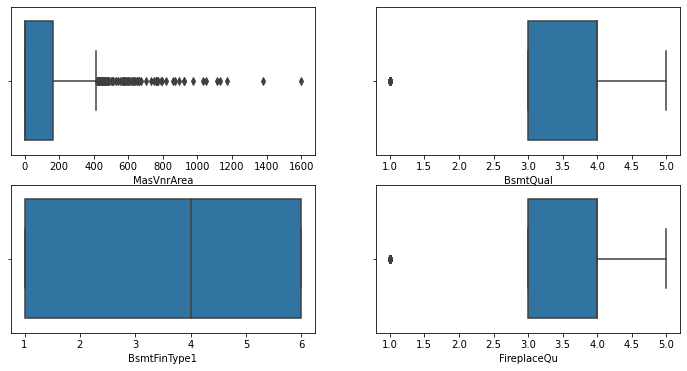

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.boxplot(housing['MasVnrArea'])
plt.subplot(2,2,2)
sns.boxplot(housing['BsmtQual'])
plt.subplot(2,2,3)
sns.boxplot(housing['BsmtFinType1'])
plt.subplot(2,2,4)
sns.boxplot(housing['FireplaceQu'])
plt.show()

Except MasVnrArea, the other three columns are not having much of any outliers.MasVnrArea ,being a numerical column and having ouliers, the missing values are to be replaced by its Median.
the other three columns are Ordinal categorical columns and are replaced by Mode value of the respective columns.

### 1.10. Imputation of remaining missing values 

In [42]:
# imputing the missing values
median2=housing['MasVnrArea'].median()
housing['MasVnrArea'].replace(np.NaN,median2,inplace=True)


In [43]:
# imputing the ordinal missing values with most_frequent
from sklearn.impute import SimpleImputer

imp_mode=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
ordvar=['BsmtQual','BsmtFinType1','FireplaceQu']
housing[ordvar]=imp_mode.fit_transform(housing[ordvar])


In [44]:
round((housing.isnull().sum()/len(housing.index))*100,2)

MSSubClass              0.0
LotFrontage             0.0
LotArea                 0.0
OverallQual             0.0
OverallCond             0.0
MasVnrArea              0.0
ExterQual               0.0
ExterCond               0.0
BsmtQual                0.0
BsmtFinType1            0.0
BsmtFinSF1              0.0
BsmtFinSF2              0.0
BsmtUnfSF               0.0
TotalBsmtSF             0.0
HeatingQC               0.0
CentralAir              0.0
1stFlrSF                0.0
2ndFlrSF                0.0
LowQualFinSF            0.0
GrLivArea               0.0
BsmtFullBath            0.0
BsmtHalfBath            0.0
FullBath                0.0
HalfBath                0.0
BedroomAbvGr            0.0
KitchenAbvGr            0.0
KitchenQual             0.0
TotRmsAbvGrd            0.0
Fireplaces              0.0
FireplaceQu             0.0
GarageCars              0.0
GarageArea              0.0
WoodDeckSF              0.0
OpenPorchSF             0.0
EnclosedPorch           0.0
3SsnPorch           

All the columns are free of misssing values now and the data is ready to use for modelling.

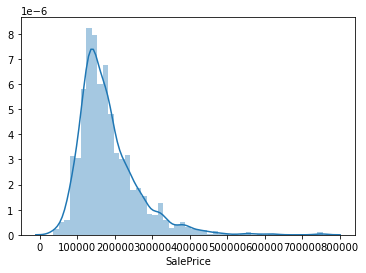

In [45]:
sns.distplot(housing["SalePrice"])
plt.show()

The Skewness on the higher side of the distribution plot of sales price indicates the presence of outliers on the higher end. So some treatment on outliers needs to be done. Power Tranformer can be used for this purpose.

## Step 2: Train-Test Split of the data


In [46]:
# Putting Feature variables to X and Target variable to y
X=housing.drop('SalePrice',axis=1)
y=housing['SalePrice']


In [47]:
# Transformation of Target column (SalePrice)
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

y=pt.fit_transform(y.to_frame())


In [48]:
# Train_test_split of data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

##  Step 3: Scaling the Features

In [49]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Apply Scaler to all columns except yes/No columns and dummy variable columns.(i.e., all numerical and ordinal variables need to be scaled.)
scaling_var=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','ExterQual',
             'ExterCond','BsmtQual','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
             'HeatingQC','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu',
             'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

# Scaling the train set
X_train[scaling_var]=scaler.fit_transform(X_train[scaling_var])


# Scaling the test set
X_test[scaling_var]=scaler.transform(X_test[scaling_var])



##  Step 4: Feature Selection using RFE



In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [51]:
# Linear Regression
lr=LinearRegression()

lr.fit(X_train, y_train)
# predict
y_train_pred = lr.predict(X_train)
rscore=r2_score(y_true=y_train, y_pred=y_train_pred)
rscore


LinearRegression()

0.890572410800627

In [52]:

rfe = RFE(lr,25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
col = X_train.columns[rfe.support_]
col


Index(['OverallQual', 'OverallCond', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'MSZoning_RL', 'LotConfig_CulDSac',
       'LotConfig_Others', 'Neighborhood_Edwards', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Others',
       'Exterior2nd_Others', 'Foundation_Others', 'Foundation_PConc',
       'GarageType_Attchd', 'GarageType_CarPort', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')

In [54]:
# Creating X_train with RFE selected variables
X_train_rfe=X_train[col]


## Step 5: Model Building and Evaluation

## 5.1 Ridge Regression

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,50.0,100.0,200.0]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.4s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 200.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002292,0.000457,0.001297,0.000456,0.0001,{'alpha': 0.0001},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223923,-0.240270,-0.266953,-0.259084,0.021402,23,-0.249712,-0.251999,-0.248330,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.247020,-0.248077,0.004274
1,0.002392,0.000489,0.001396,0.000488,0.001,{'alpha': 0.001},-0.252094,-0.230082,-0.281817,-0.271013,-0.272699,-0.293631,-0.258358,-0.223923,-0.240271,-0.266952,-0.259084,0.021402,22,-0.249712,-0.251999,-0.248330,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.247020,-0.248077,0.004274
2,0.002492,0.000803,0.001595,0.000488,0.01,{'alpha': 0.01},-0.252094,-0.230075,-0.281807,-0.271016,-0.272695,-0.293624,-0.258352,-0.223916,-0.240277,-0.266948,-0.259080,0.021402,21,-0.249712,-0.251999,-0.248330,-0.238818,-0.248355,-0.242193,-0.249012,-0.252706,-0.252627,-0.247018,-0.248077,0.004274
3,0.002592,0.000662,0.001495,0.000668,0.05,{'alpha': 0.05},-0.252094,-0.230044,-0.281765,-0.271026,-0.272679,-0.293595,-0.258326,-0.223884,-0.240304,-0.266931,-0.259065,0.021398,20,-0.249709,-0.251998,-0.248330,-0.238821,-0.248354,-0.242191,-0.249009,-0.252704,-0.252625,-0.247012,-0.248075,0.004273
4,0.003189,0.000975,0.001793,0.000596,0.1,{'alpha': 0.1},-0.252094,-0.230006,-0.281713,-0.271039,-0.272659,-0.293559,-0.258293,-0.223845,-0.240338,-0.266909,-0.259046,0.021394,19,-0.249705,-0.251997,-0.248329,-0.238824,-0.248351,-0.242188,-0.249004,-0.252701,-0.252624,-0.247005,-0.248073,0.004272


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

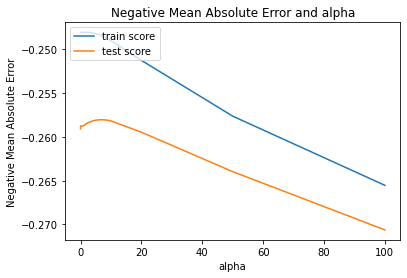

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
#Model with optimal alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)


Ridge(alpha=10)

In [59]:
ridge.coef_


array([[ 0.29864551,  0.11899252,  0.25384236,  0.28620627,  0.26415107,
         0.10929855,  0.16846883,  0.28423587,  0.12029218, -0.05438149,
        -0.25774653, -0.07367298,  0.25069777, -0.16380801, -0.12188339,
         0.34377991, -0.06574728,  0.0958782 , -0.10018786, -0.06592196,
         0.1586033 ,  0.13796456, -0.11374828, -0.07873651, -0.1645913 ]])

In [60]:
ridge.intercept_

array([-0.48255668])

In [61]:
# predict and calculate r2_score
y_train_pred =ridge.predict(X_train_rfe)
ridge.score(X_train_rfe,y_train)
X_test_rfe=X_test[X_train_rfe.columns]
y_test_pred = ridge.predict(X_test_rfe)
ridge.score(X_test_rfe,y_test)


0.8658817761582492

0.8584996056041483

In [62]:
model_parameters=list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
cols = X_train_rfe.columns
cols = cols.insert(0,"constant")
list(zip(cols,model_parameters))


[('constant', array([-0.48255668])),
 ('OverallQual',
  array([ 0.29864551,  0.11899252,  0.25384236,  0.28620627,  0.26415107,
          0.10929855,  0.16846883,  0.28423587,  0.12029218, -0.05438149,
         -0.25774653, -0.07367298,  0.25069777, -0.16380801, -0.12188339,
          0.34377991, -0.06574728,  0.0958782 , -0.10018786, -0.06592196,
          0.1586033 ,  0.13796456, -0.11374828, -0.07873651, -0.1645913 ]))]

## 5.2 Lasso Regression

In [63]:
lasso = Lasso()
params1=[{'alpha': [1e-13,2e-13,5e-13,1e-12,2e-12,5e-12,1e-11,2e-11,5e-11,1e-10,2e-10,5e-10,1e-09,2e-09,5e-09,
                    1e-08,2e-08,5e-08, 1e-07,2e-07,5e-07, 1e-06,2e-06,5e-06, 1e-05,2e-05,5e-05, 0.0001,0.0002,
                    0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,
                                    0.001,0.01,0.02,0.03,0.05,0.1,0.5,1]}]


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 


Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    2.4s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1e-13, 2e-13, 5e-13, 1e-12, 2e-12, 5e-12,
                                    1e-11, 2e-11, 5e-11, 1e-10, 2e-10, 5e-10,
                                    1e-09, 2e-09, 5e-09, 1e-08, 2e-08, 5e-08,
                                    1e-07, 2e-07, 5e-07, 1e-06, 2e-06, 5e-06,
                                    1e-05, 2e-05, 5e-05, 0.0001, 0.0002, 0.0003, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.02]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004085,2.154104e-03,0.001295,0.000638,1e-13,{'alpha': 1e-13},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223924,-0.24027,-0.266953,-0.259084,0.021402,37,-0.249712,-0.251999,-0.24833,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.24702,-0.248077,0.004274
1,0.003090,2.986992e-04,0.001295,0.000457,2e-13,{'alpha': 2e-13},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223924,-0.24027,-0.266953,-0.259084,0.021402,36,-0.249712,-0.251999,-0.24833,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.24702,-0.248077,0.004274
2,0.002990,6.555427e-07,0.001395,0.000488,5e-13,{'alpha': 5e-13},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223924,-0.24027,-0.266953,-0.259084,0.021402,35,-0.249712,-0.251999,-0.24833,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.24702,-0.248077,0.004274
3,0.003588,4.883561e-04,0.001596,0.000659,1e-12,{'alpha': 1e-12},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223924,-0.24027,-0.266953,-0.259084,0.021402,34,-0.249712,-0.251999,-0.24833,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.24702,-0.248077,0.004274
4,0.002990,5.936575e-07,0.001296,0.000457,2e-12,{'alpha': 2e-12},-0.252094,-0.230083,-0.281818,-0.271013,-0.272699,-0.293631,-0.258359,-0.223924,-0.24027,-0.266953,-0.259084,0.021402,33,-0.249712,-0.251999,-0.24833,-0.238817,-0.248356,-0.242194,-0.249013,-0.252706,-0.252627,-0.24702,-0.248077,0.004274


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

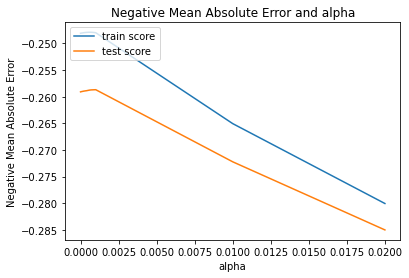

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
#Model with optimal Alpha
alpha =0.00125

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.00125)

In [67]:
# predict
y_train_pred = lasso.predict(X_train_rfe)
lasso.score(X_train_rfe,y_train)
X_test_rfe=X_test[X_train_rfe.columns]
y_test_pred = lasso.predict(X_test_rfe)
lasso.score(X_test_rfe,y_test)

0.8663503596712574

0.8579565341645429

In [68]:
lasso.coef_

array([ 0.29386723,  0.11927376,  0.27461713,  0.28973112,  0.26864282,
        0.11019491,  0.16180931,  0.31230774,  0.11837904, -0.03102607,
       -0.28337306, -0.07805991,  0.28381559, -0.15258012, -0.12936113,
        0.40882118, -0.06627833,  0.07391795, -0.09643092, -0.02901501,
        0.15330679,  0.13424526, -0.09746128, -0.0795267 , -0.16246864])

In [69]:
lasso.intercept_

array([-0.5251491])

In [70]:
model_parameters = list(lasso.coef_)
model_parameters =[round(x, 3) for x in model_parameters]
model_parameters.insert(0, lasso.intercept_)
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
lasso_coef=pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef


,0,1
0,constant,[-0.5251490995310538]
1,OverallQual,0.294
2,OverallCond,0.119
3,CentralAir,0.275
4,1stFlrSF,0.29
5,2ndFlrSF,0.269
6,BsmtFullBath,0.11
7,GarageCars,0.162
8,MSZoning_RL,0.312
9,LotConfig_CulDSac,0.118


# Section-2

## Assignment Part-II

## Subjective Questions

### Question :1

If the optimal alpha values are doubled for ridge and lasso regressions,

#### Ridge regression(alpha=20)

In [71]:
# Ridge regression Model with double the vaue of optimal alpha
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_
ridge.intercept_

Ridge(alpha=20)

array([[ 0.31017488,  0.11674706,  0.22958871,  0.28328484,  0.24998701,
         0.10815763,  0.17331515,  0.25787968,  0.11033906, -0.04039625,
        -0.21734931, -0.05804511,  0.20511469, -0.15097028, -0.09146014,
         0.27677599, -0.04209877,  0.0708354 , -0.09610446, -0.05532833,
         0.16121886,  0.13597706, -0.07172858, -0.06445797, -0.16060099]])

array([-0.45389286])

In [72]:
# predict
y_train_pred =ridge.predict(X_train_rfe)
ridge.score(X_train_rfe,y_train)
X_test_rfe=X_test[X_train_rfe.columns]
y_test_pred = ridge.predict(X_test_rfe)
ridge.score(X_test_rfe,y_test)

0.8637996882134853

0.8587339738203951

In [73]:
model_parameters= list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', array([-0.45389286])),
 ('OverallQual',
  array([ 0.31017488,  0.11674706,  0.22958871,  0.28328484,  0.24998701,
          0.10815763,  0.17331515,  0.25787968,  0.11033906, -0.04039625,
         -0.21734931, -0.05804511,  0.20511469, -0.15097028, -0.09146014,
          0.27677599, -0.04209877,  0.0708354 , -0.09610446, -0.05532833,
          0.16121886,  0.13597706, -0.07172858, -0.06445797, -0.16060099]))]

#### Lasso Regression(alpha=0.0025)

In [74]:
#Model with optimal Alpha
alpha =0.0025

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0025)

In [75]:
# predict
y_train_pred = lasso.predict(X_train_rfe)
lasso.score(X_train_rfe,y_train)
y_test_pred = lasso.predict(X_test_rfe)
lasso.score(X_test_rfe,y_test)

0.8642845776157084

0.8589047969776306

In [76]:
lasso.coef_

array([ 0.30710084,  0.11698998,  0.26120294,  0.28967557,  0.25291135,
        0.10877139,  0.16276801,  0.29902361,  0.10521235, -0.        ,
       -0.24604773, -0.05501398,  0.24286683, -0.12702418, -0.08252258,
        0.36402111, -0.03107651,  0.00102143, -0.08726044, -0.        ,
        0.15605919,  0.12797517, -0.        , -0.06152226, -0.15618239])

In [77]:
model_parameters = list(lasso.coef_)
model_parameters =[round(x, 3) for x in model_parameters]
model_parameters.insert(0, lasso.intercept_)
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
lasso_coef=pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef

,0,1
0,constant,[-0.5250235147012363]
1,OverallQual,0.307
2,OverallCond,0.117
3,CentralAir,0.261
4,1stFlrSF,0.29
5,2ndFlrSF,0.253
6,BsmtFullBath,0.109
7,GarageCars,0.163
8,MSZoning_RL,0.299
9,LotConfig_CulDSac,0.105


### Question 3

If the top 5 features indicated by lasso with optimal value of alpha are not available in the new incoming data, we need to delete those and find next top 5.

The Top 5 variables for Lasso with alpha=0.00125 were:

    1) Neighborhood_Somerst  
    2) MSZoning_RL
    3) OverallQual
    4) 1stFlrSF
    5) Neighborhood_NridgHt
    
Now, these variables need to be removed and we need to run the model again with optimal value alpha=0.00125 to find the new Top-5 list.


In [78]:
# removing the above mentioned columns from the data
X_train_new=X_train_rfe.drop(['Neighborhood_Somerst','MSZoning_RL','OverallQual','1stFlrSF','Neighborhood_NridgHt'],axis=1)
X_train_new.shape

(1021, 20)

In [79]:
# run the Lasso again with new dataset X_train_new
lasso = Lasso()
params1=[{'alpha': [1e-13,2e-13,5e-13,1e-12,2e-12,5e-12,1e-11,2e-11,5e-11,1e-10,2e-10,5e-10,1e-09,2e-09,5e-09,
                    1e-08,2e-08,5e-08, 1e-07,2e-07,5e-07, 1e-06,2e-06,5e-06, 1e-05,2e-05,5e-05, 0.0001,0.0002,
                    0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,
                                    0.001,0.01,0.02,0.03,0.05,0.1,0.5,1]}]


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 


Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    2.3s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1e-13, 2e-13, 5e-13, 1e-12, 2e-12, 5e-12,
                                    1e-11, 2e-11, 5e-11, 1e-10, 2e-10, 5e-10,
                                    1e-09, 2e-09, 5e-09, 1e-08, 2e-08, 5e-08,
                                    1e-07, 2e-07, 5e-07, 1e-06, 2e-06, 5e-06,
                                    1e-05, 2e-05, 5e-05, 0.0001, 0.0002, 0.0003, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.02]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003986,0.002182,0.001694,0.000897,1e-13,{'alpha': 1e-13},-0.427243,-0.360889,-0.43322,-0.389426,-0.511878,-0.390764,-0.377117,-0.391882,-0.422147,-0.403876,-0.410844,0.04001,1,-0.398527,-0.406013,-0.397929,-0.402371,-0.388561,-0.404579,-0.403632,-0.40221,-0.399549,-0.400463,-0.400383,0.004659
1,0.002891,0.000299,0.001395,0.000488,2e-13,{'alpha': 2e-13},-0.427243,-0.360889,-0.43322,-0.389426,-0.511878,-0.390764,-0.377117,-0.391882,-0.422147,-0.403876,-0.410844,0.04001,2,-0.398527,-0.406013,-0.397929,-0.402371,-0.388561,-0.404579,-0.403632,-0.40221,-0.399549,-0.400463,-0.400383,0.004659
2,0.002791,0.000399,0.001196,0.000398,5e-13,{'alpha': 5e-13},-0.427243,-0.360889,-0.43322,-0.389426,-0.511878,-0.390764,-0.377117,-0.391882,-0.422147,-0.403876,-0.410844,0.04001,3,-0.398527,-0.406013,-0.397929,-0.402371,-0.388561,-0.404579,-0.403632,-0.40221,-0.399549,-0.400463,-0.400383,0.004659
3,0.003389,0.000913,0.001495,0.000499,1e-12,{'alpha': 1e-12},-0.427243,-0.360889,-0.43322,-0.389426,-0.511878,-0.390764,-0.377117,-0.391882,-0.422147,-0.403876,-0.410844,0.04001,4,-0.398527,-0.406013,-0.397929,-0.402371,-0.388561,-0.404579,-0.403632,-0.40221,-0.399549,-0.400463,-0.400383,0.004659
4,0.003289,0.000778,0.001595,0.000489,2e-12,{'alpha': 2e-12},-0.427243,-0.360889,-0.43322,-0.389426,-0.511878,-0.390764,-0.377117,-0.391882,-0.422147,-0.403876,-0.410844,0.04001,5,-0.398527,-0.406013,-0.397929,-0.402371,-0.388561,-0.404579,-0.403632,-0.40221,-0.399549,-0.400463,-0.400383,0.004659


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

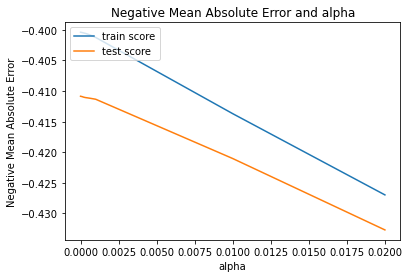

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The optimal value of alpha appears to be almost similar to what we had in the previous model.(0.00125)


In [82]:
#Model with optimal Alpha witgh new dataset X_train_new
alpha =0.00125

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.00125)

In [83]:
# predict
y_train_pred = lasso.predict(X_train_new)
lasso.score(X_train_new,y_train)
X_test_new=X_test[X_train_new.columns]
y_test_pred = lasso.predict(X_test_new)
lasso.score(X_test_new,y_test)

0.7165618498550629

0.700637359009368

In [84]:
lasso.coef_

array([ 0.12971629,  0.34807608,  0.36366279,  0.13687181,  0.4176644 ,
        0.20166611, -0.15014842, -0.27494514, -0.06065331, -0.38990834,
       -0.22670019, -0.39685447,  0.08415849,  0.        , -0.204319  ,
        0.33150523,  0.32952033, -0.08293001, -0.13929155, -0.44642832])

In [85]:
model_parameters = list(lasso.coef_)
model_parameters =[round(x, 3) for x in model_parameters]
model_parameters.insert(0, lasso.intercept_)
cols = X_train_new.columns
cols = cols.insert(0, "constant")
lasso_coef=pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef

,0,1
0,constant,[-0.25814431445517083]
1,OverallCond,0.13
2,CentralAir,0.348
3,2ndFlrSF,0.364
4,BsmtFullBath,0.137
5,GarageCars,0.418
6,LotConfig_CulDSac,0.202
7,LotConfig_Others,-0.15
8,Neighborhood_Edwards,-0.275
9,Neighborhood_NAmes,-0.061


The Top 5 predictors now will be:
     
        1) GarageFinish_Unf      -0.446
        2) GarageCars             0.418
        3) HouseStyle_2Story     -0.397
        4) Neighborhood_OldTown  -0.39
        5) 2ndFlrSF               0.364
        
The negative coefficients indicate that they have negative influence on the saleprice of the house , i.e., for a unit rise in those negative coefficients , the Saleprice decreases by the value of the coefficient.
